In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.calibration import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import joblib
import time
import os

In [2]:
data= pd.read_csv('../data/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
data['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [5]:
data.shape

(2200, 8)

In [6]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 2200
Number of columns: 8


In [7]:
# Tạo LabelEncoder và mã hóa nhãn
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# ===== Tách đặc trưng và nhãn =====
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

In [8]:
# Lấy danh sách cây trồng đã được mã hóa
crop_names = label_encoder.classes_

In [9]:
print("Label mapping:")
for i, crop in enumerate(label_encoder.classes_):
    print(f'Label {i}: {crop}')

Label mapping:
Label 0: apple
Label 1: banana
Label 2: blackgram
Label 3: chickpea
Label 4: coconut
Label 5: coffee
Label 6: cotton
Label 7: grapes
Label 8: jute
Label 9: kidneybeans
Label 10: lentil
Label 11: maize
Label 12: mango
Label 13: mothbeans
Label 14: mungbean
Label 15: muskmelon
Label 16: orange
Label 17: papaya
Label 18: pigeonpeas
Label 19: pomegranate
Label 20: rice
Label 21: watermelon


In [10]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [11]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label            int64
dtype: object

In [12]:
X = data.drop(['label'],axis=1)
Y = data.label

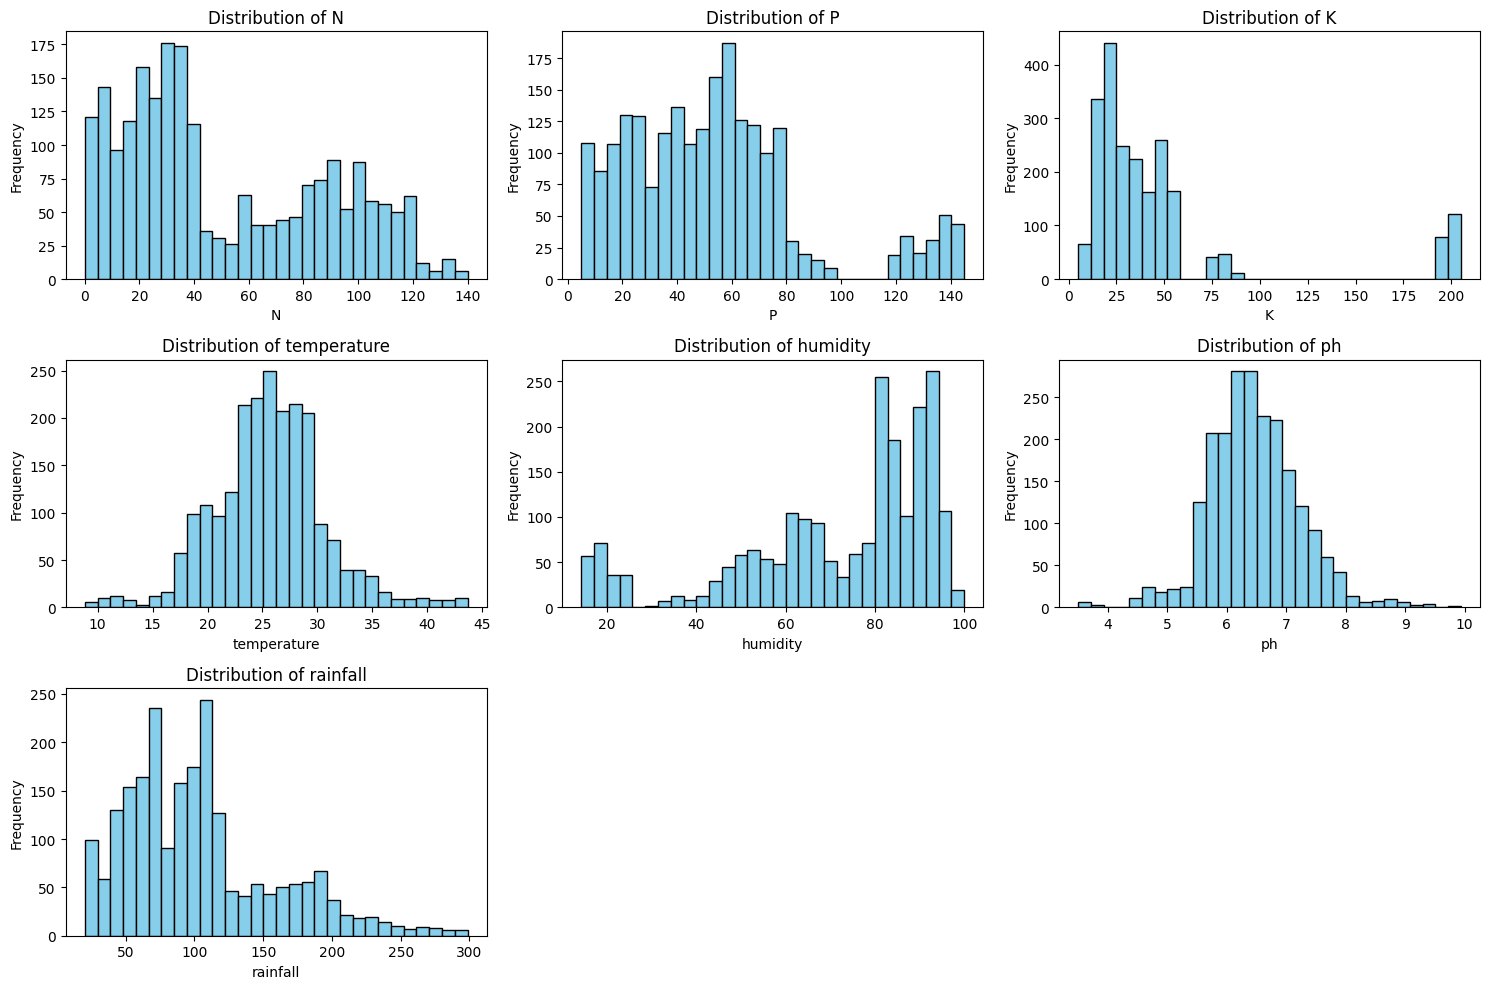

In [13]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], 1):
    plt.subplot(3, 3, i)
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

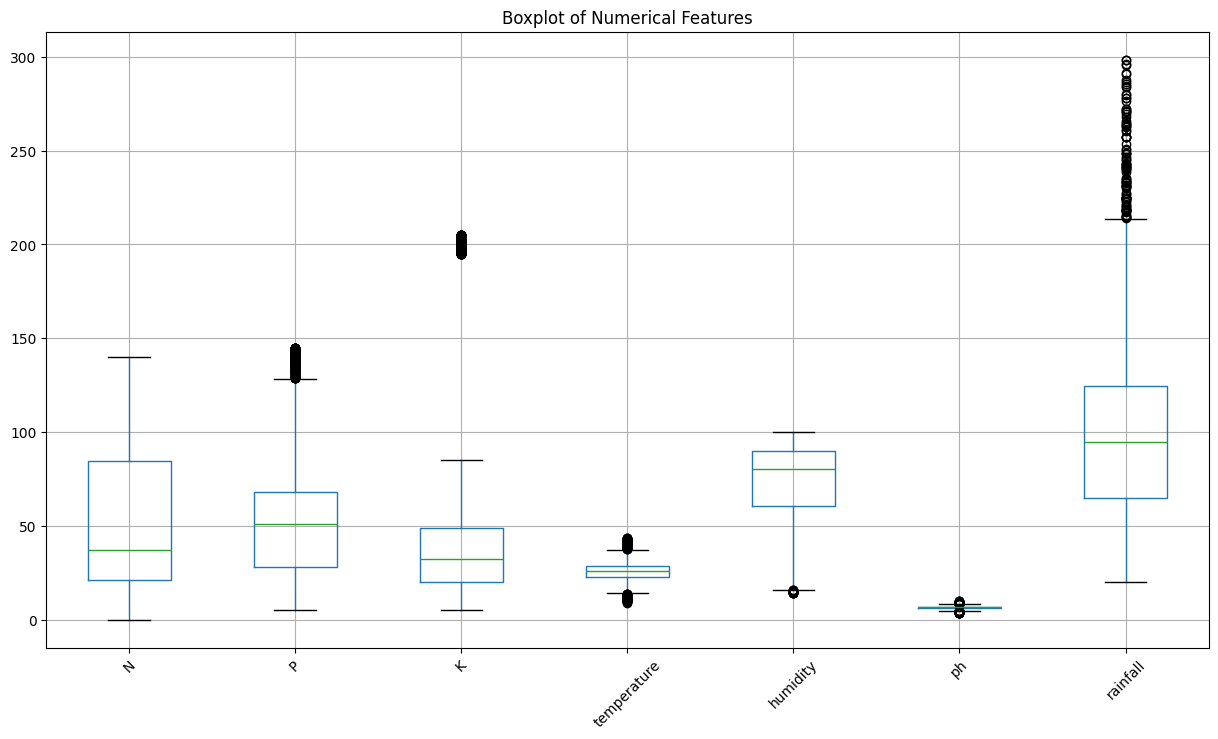

In [14]:
plt.figure(figsize=(15, 8))
data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].boxplot()
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

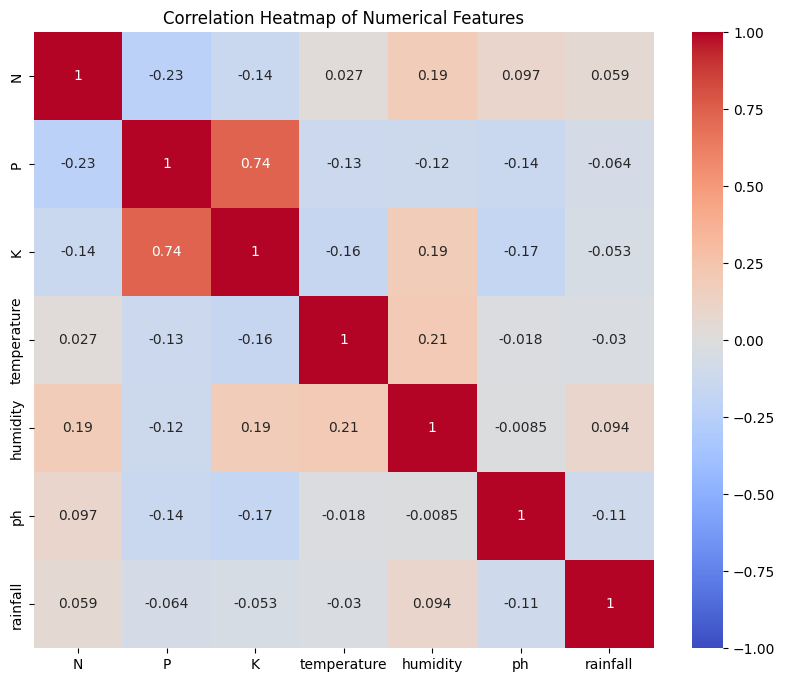

In [15]:
# Tạo ma trận tương quan
plt.figure(figsize=(10, 8))
corr = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

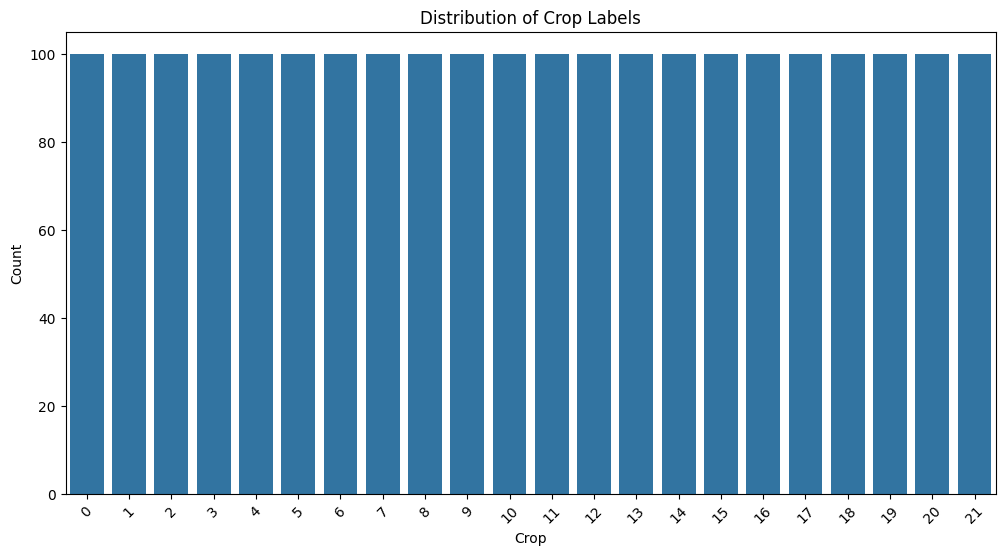

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Crop Labels')
plt.xticks(rotation=45)
plt.xlabel('Crop')
plt.ylabel('Count')
plt.show()

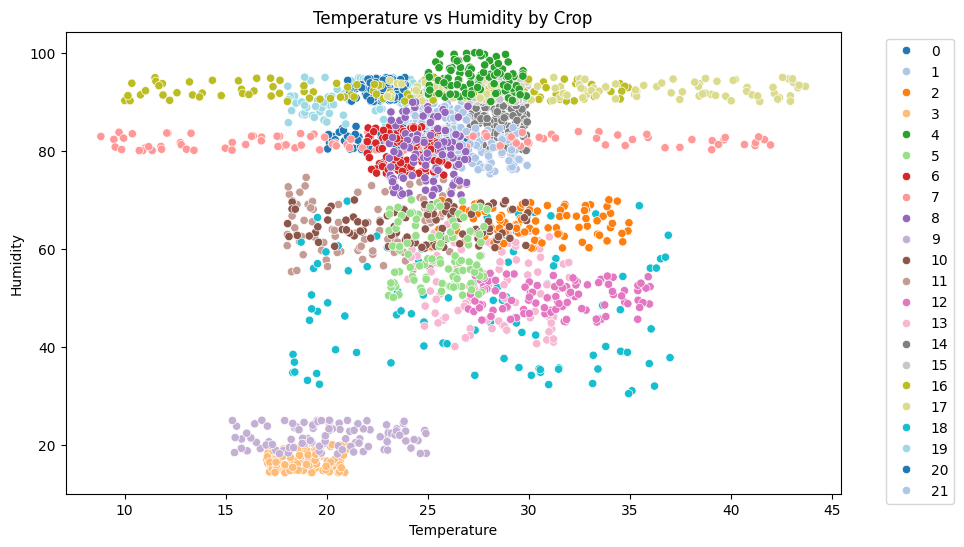

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', hue='label', data=data, palette='tab20')
plt.title('Temperature vs Humidity by Crop')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [18]:
# =====CHIA TẬP DỮ LIỆU =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (1760, 7), Test set size: (440, 7)


In [19]:
# ===== CHUẨN HÓA =====
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# ===== CẤU HÌNH MÔ HÌNH & THAM SỐ =====
models_params = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [10, 15, 20],  # Tăng số láng giềng
            'weights': ['uniform', 'distance']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=len(crop_names), random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1]
        }
    }
}

In [21]:
# ===== HUẤN LUYỆN VÀ ĐÁNH GIÁ =====
results = {}
best_models = {}

for model_name, config in models_params.items():
    print(f'\nTraining {model_name}...')
    start_time = time.time()

    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Lấy Classification Report dưới dạng từ điển
    report = classification_report(y_test, y_pred, target_names=crop_names, output_dict=True)

    # Lưu vào results
    results[model_name] = {
        'accuracy': accuracy,
        'best_params': grid_search.best_params_,
        'time': time.time() - start_time,
        'classification_report': report  # Thêm key 'classification_report'
    }
    best_models[model_name] = best_model

    print(f"{model_name} - Accuracy: {accuracy:.4f}, Time: {results[model_name]['time']:.2f}s")
    
    # In Classification Report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=crop_names))



Training KNN...
KNN - Accuracy: 0.9568, Time: 4.11s

Classification Report for KNN:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.79      0.96      0.86        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.95      0.98        21
       mango       0.86      1.00      0.93        19
   mothbeans       1.00      0.83      0.91        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00       

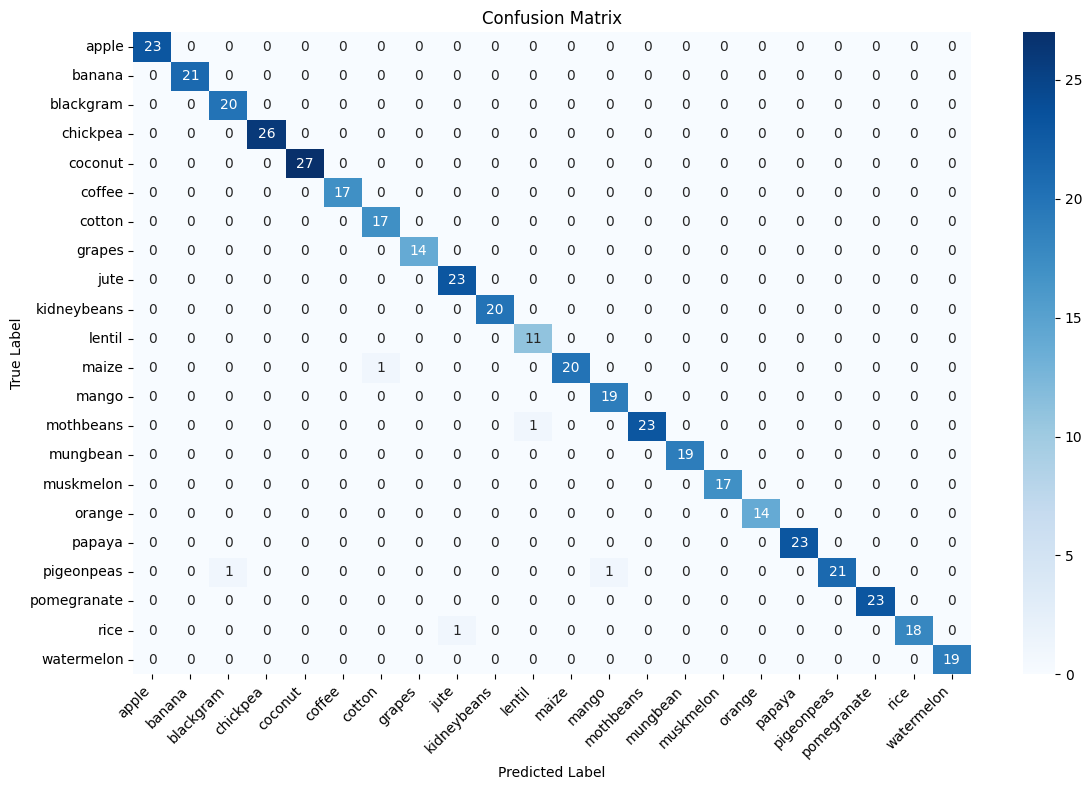

In [22]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=crop_names, yticklabels=crop_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
# ===== SO SÁNH MÔ HÌNH =====
print("\n=== So sánh mô hình ===")
for model_name, result in results.items():
    f1_score_weighted = result['classification_report']['weighted avg']['f1-score']
    print(f"{model_name} - Accuracy: {result['accuracy']:.4f}, F1-Score (Weighted Avg): {f1_score_weighted:.4f}, Time: {result['time']:.2f}s")


=== So sánh mô hình ===
KNN - Accuracy: 0.9568, F1-Score (Weighted Avg): 0.9565, Time: 4.11s
LogisticRegression - Accuracy: 0.9705, F1-Score (Weighted Avg): 0.9704, Time: 0.18s
XGBoost - Accuracy: 0.9886, F1-Score (Weighted Avg): 0.9886, Time: 6.37s


In [24]:
# ===== CHỌN MÔ HÌNH TỐT NHẤT =====
best_model_name = 'KNN'
best_model = best_models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]['accuracy']:.4f}")


Best Model: KNN with Accuracy: 0.9568


In [25]:
# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Resolve the absolute path for the data directory
data_dir = os.path.abspath('../data')
print("Data Directory (absolute path):", data_dir)

# Ensure the data directory exists, create it if it doesn't
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Created directory: {data_dir}")
else:
    print(f"Data directory already exists: {data_dir}")

Current Working Directory: k:\Anaconda\Crop-Recommendation-main\notebook
Data Directory (absolute path): k:\Anaconda\Crop-Recommendation-main\data
Data directory already exists: k:\Anaconda\Crop-Recommendation-main\data


In [26]:
# ===== Lưu scaler và danh sách cây trồng =====
joblib.dump(scaler, '../data/scaler.pkl')
joblib.dump(crop_names, '../data/crop_names.pkl')

['../data/crop_names.pkl']

In [ ]:
#  Lưu mô hình và label encoder
joblib.dump(best_model, '../data/model.pkl')
joblib.dump(label_encoder, '../data/label_encoder.pkl')

['../data/label_encoder.pkl']

In [29]:
print('Model,crop names, scaler, and label encoder saved successfully!')

Model,crop names, scaler, and label encoder saved successfully!
